In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sys
import tensorflow
import keras
import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from quicksemble.ensembler import Ensembler
from sklearn.linear_model import LogisticRegression
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense,Dropout
from keras.layers import Flatten, LSTM


 
import warnings
warnings.filterwarnings('ignore')

In [38]:
df = pd.read_csv(r"C:\Users\ASHISH PRATAP SINGH\Downloads\Stock_Price_data_set_(1).csv",index_col="Date",parse_dates=True)

In [39]:
print(df.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-05-02  262.000000  267.899994  250.029999  254.259995  254.259995   
2018-06-02  247.699997  266.700012  245.000000  265.720001  265.720001   
2018-07-02  266.579987  272.450012  264.329987  264.559998  264.559998   
2018-08-02  267.079987  267.619995  250.000000  250.100006  250.100006   
2018-09-02  253.850006  255.800003  236.110001  249.470001  249.470001   

              Volume  
Date                  
2018-05-02  11896100  
2018-06-02  12595800  
2018-07-02   8981500  
2018-08-02   9306700  
2018-09-02  16906900  


In [40]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-11,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
2020-06-11,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
2020-07-11,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
2020-08-11,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
2020-09-11,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [41]:
df.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [42]:
df.shape

(1009, 6)

In [43]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1009 entries, 2018-05-02 to 2020-09-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1009 non-null   float64
 1   High       1009 non-null   float64
 2   Low        1009 non-null   float64
 3   Close      1009 non-null   float64
 4   Adj Close  1009 non-null   float64
 5   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.2 KB


<AxesSubplot:xlabel='Date'>

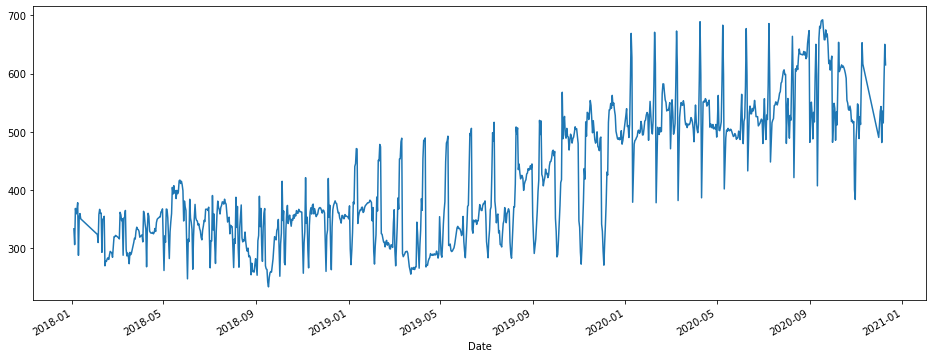

In [45]:
df['Open'].plot(figsize=(16,6))

In [46]:
df.rolling(7).mean().head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-02,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-02,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-02,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-02,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-02,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-02,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-02,258.091426,264.432859,249.881426,257.190000,257.190000,1.072530e+07
2018-12-02,257.872855,264.715718,251.352853,258.867144,258.867144,1.059329e+07
2018-02-13,261.062855,266.687145,254.585711,260.945714,260.945714,1.033099e+07


<AxesSubplot:xlabel='Date'>

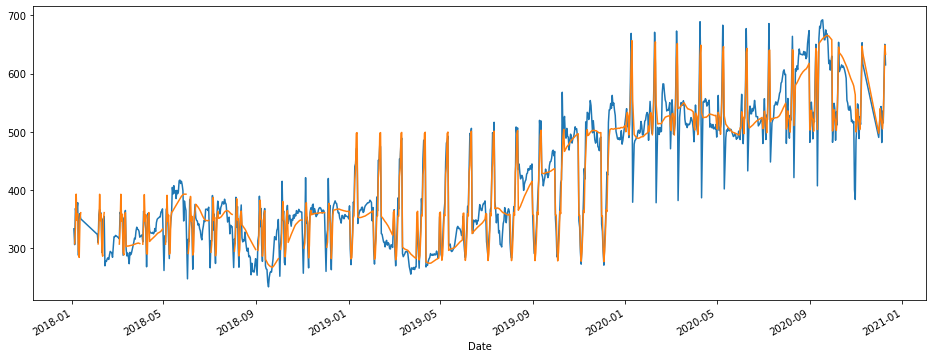

In [47]:
df['Open'].plot(figsize=(16,6))
df.rolling(window=30).mean()['Close'].plot()

<AxesSubplot:xlabel='Date'>

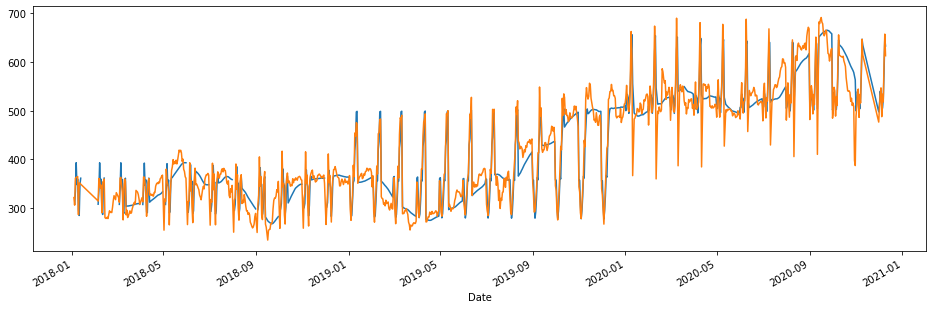

In [48]:
df['close: 30 Day Mean'] = df['Close'].rolling(window=30).mean().plot(figsize=(16,6))
df['Close'].plot(figsize=(16,5))

In [49]:
#df['close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()
#df[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

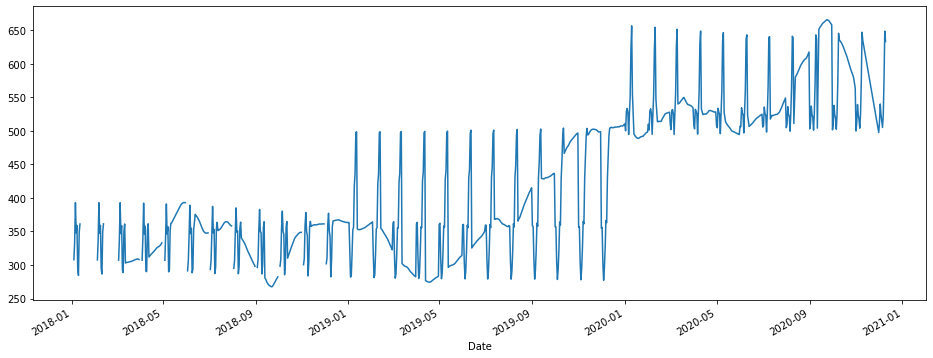

In [50]:
df['Close'].rolling(window=30).mean().plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

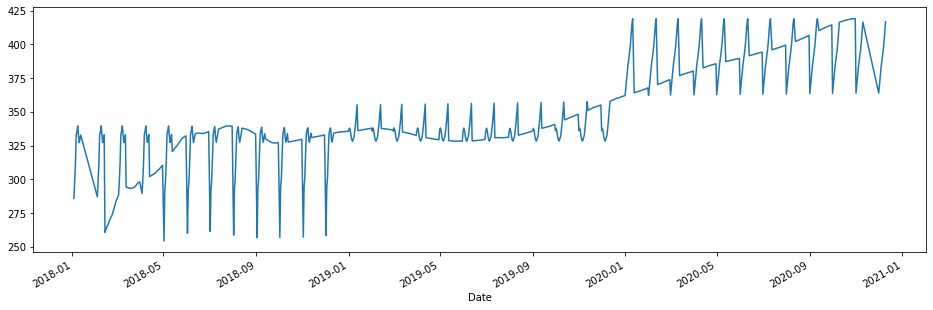

In [51]:
df['Close'].expanding(min_periods=1).mean().plot(figsize=(16,5))

In [52]:
training_set=df['Open']
training_set=pd.DataFrame(training_set)

In [53]:
from sklearn.preprocessing import MinMaxScaler
SC = MinMaxScaler(feature_range = (0,1))
training_set_scaled = SC.fit_transform(training_set)

In [54]:
X_train=[]
Y_train=[]
for i in range (60,1009):
    X_train.append(training_set_scaled[i-60:i,0])
    Y_train.append(training_set_scaled[i,0])
X_train, Y_train = np.array(X_train),np.array(Y_train)

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

In [55]:
regressor=Sequential()

In [56]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [57]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, Y_train, epochs = 100, batch_size=32)

Epoch 1/100
30/30 [==============================] - 7s 45ms/step - loss: 0.0348
Epoch 2/100
30/30 [==============================] - 1s 45ms/step - loss: 0.0092
Epoch 3/100
30/30 [==============================] - 1s 47ms/step - loss: 0.0085
Epoch 4/100
30/30 [==============================] - 1s 45ms/step - loss: 0.0087
Epoch 5/100
30/30 [==============================] - 1s 44ms/step - loss: 0.0073
Epoch 6/100
30/30 [==============================] - 1s 45ms/step - loss: 0.0059
Epoch 7/100
30/30 [==============================] - 1s 45ms/step - loss: 0.0060
Epoch 8/100
30/30 [==============================] - 1s 45ms/step - loss: 0.0064
Epoch 9/100
30/30 [==============================] - 1s 46ms/step - loss: 0.0061
Epoch 10/100
30/30 [==============================] - 1s 45ms/step - loss: 0.0055
Epoch 11/100
30/30 [==============================] - 1s 48ms/step - loss: 0.0054
Epoch 12/100
30/30 [==============================] - 2s 51ms/step - loss: 0.0060
Epoch 13/100
30/30 [=====

In [58]:
df_test=pd.read_csv(r"C:\Users\ASHISH PRATAP SINGH\Downloads\Stock_Price_data_set_(1).csv",index_col="Date",parse_dates=True)

In [59]:
real_stock_price = df_test.iloc[:, 1:2].values

In [60]:
df_test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-02,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-06-02,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-07-02,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-08-02,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-09-02,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [61]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1009 entries, 2018-05-02 to 2020-09-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1009 non-null   float64
 1   High       1009 non-null   float64
 2   Low        1009 non-null   float64
 3   Close      1009 non-null   float64
 4   Adj Close  1009 non-null   float64
 5   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.2 KB


In [63]:
df_test['Volume'] = df_test['Volume'].astype(str).str.replace(',', '').astype(float)

In [66]:
test_set=df_test['Open']
test_set=pd.DataFrame(test_set)

In [67]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1009 entries, 2018-05-02 to 2020-09-11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1009 non-null   float64
dtypes: float64(1)
memory usage: 15.8 KB


In [70]:
df_total = pd.concat((df['Open'], df_test['Open']), axis = 0)
inputs = df_total[len(df_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = SC.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_tets = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = SC.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


In [73]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info

<bound method DataFrame.info of              0
0   410.522156
1   338.077728
2   259.195557
3   226.941147
4   244.705582
5   272.168915
6   285.055725
7   284.177856
8   276.775024
9   270.875000
10  269.974243
11  270.515442
12  271.461182
13  272.585175
14  272.557068
15  274.714478
16  280.348755
17  285.566925
18  288.141998
19  285.764893>

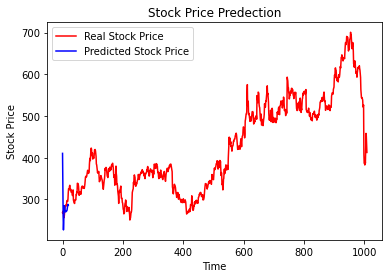

In [75]:
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Predection')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [76]:
df.columns = ['Open', 'High', 'Low', 'Close', ' Adj Close', 'Volume', 'close: 30 Day Mean']
df.index.name = "Open"

In [79]:
df.isnull().sum()

Open                  0
High                  0
Low                   0
Close                 0
 Adj Close            0
Volume                0
close: 30 Day Mean    0
dtype: int64

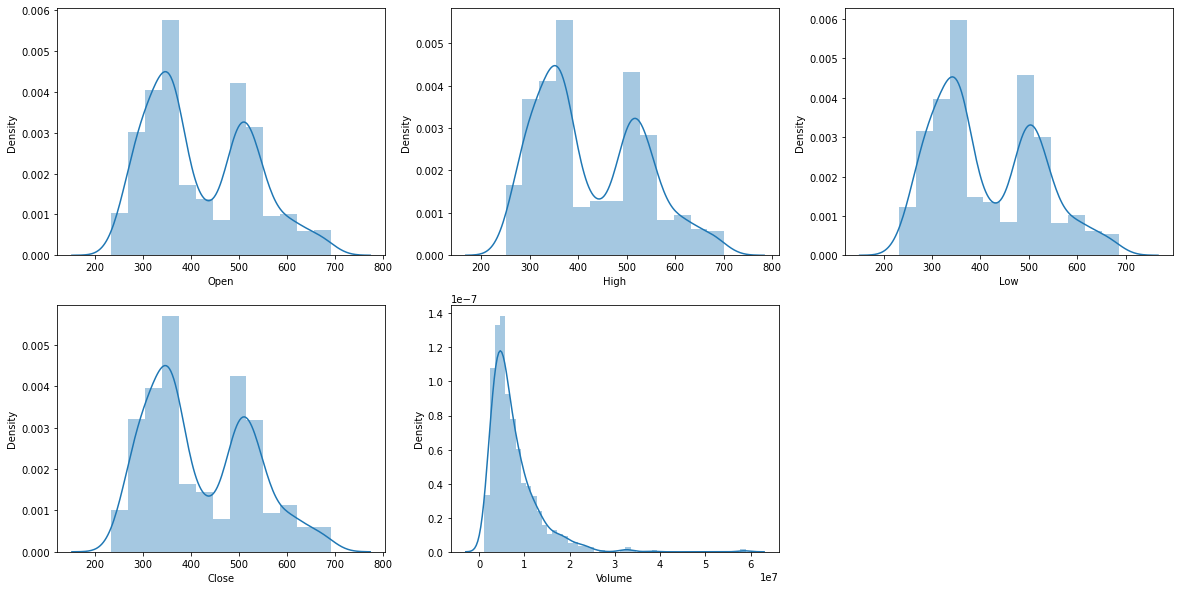

In [80]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

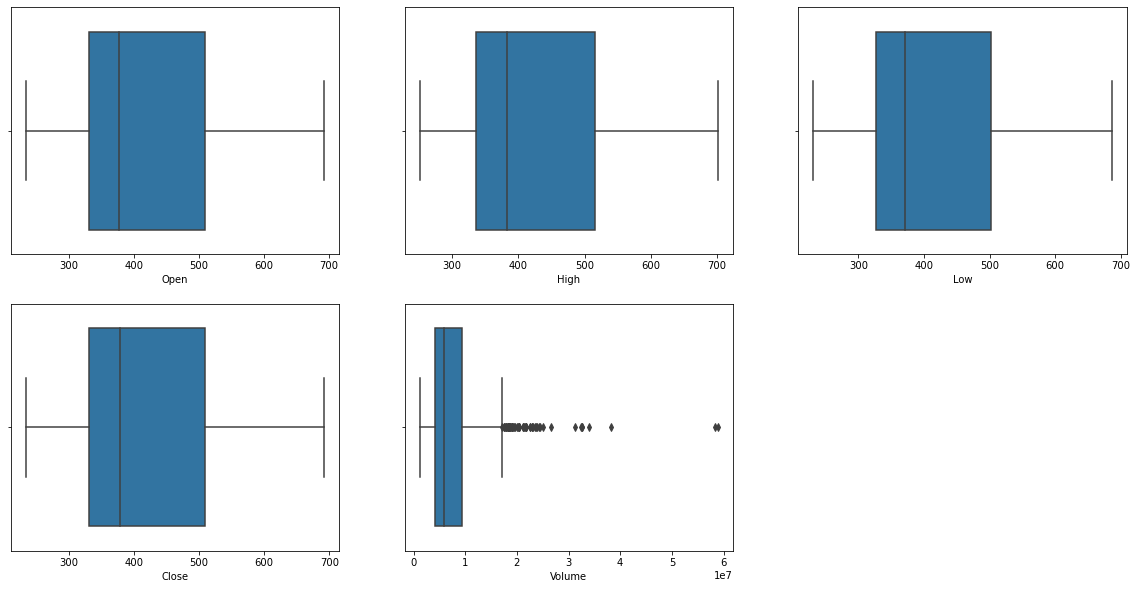

In [81]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

In [82]:
print(df.columns.tolist())

['Open', 'High', 'Low', 'Close', ' Adj Close', 'Volume', 'close: 30 Day Mean']


In [83]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

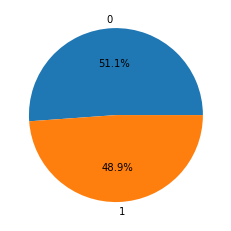

In [84]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

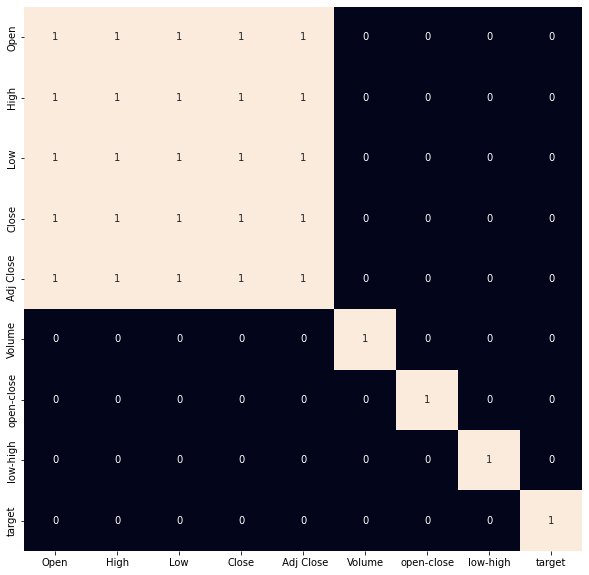

In [85]:
plt.figure(figsize=(10, 10))
 
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()